In [6]:
# Imports
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Importação do dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [8]:
# Definição do label contendo as classes de roupas
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

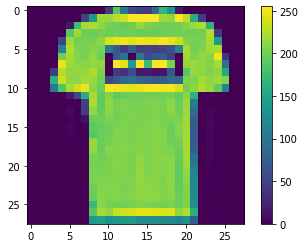

In [9]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
train_images.mean()

72.94035223214286

In [21]:
# Alocar os dados em um intervalo de 0 a 1
train_images = train_images / 255.0
test_images = test_images / 255.0

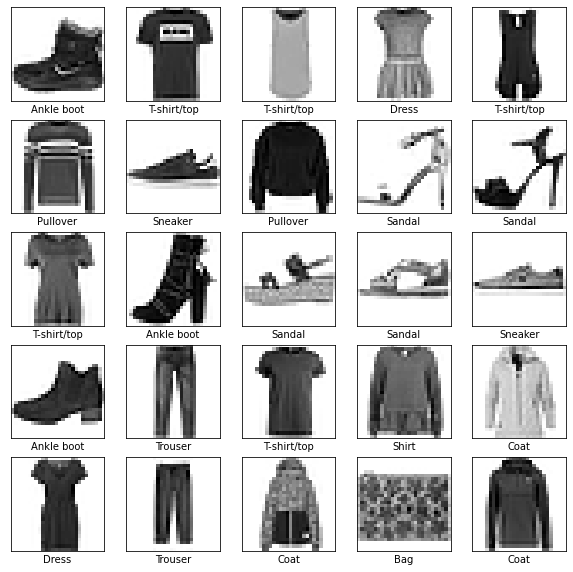

In [23]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [25]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.5002 - accuracy: 0.8243
Epoch 2/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.3752 - accuracy: 0.8651
Epoch 3/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.3374 - accuracy: 0.8769
Epoch 4/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.3135 - accuracy: 0.8853
Epoch 5/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2948 - accuracy: 0.8915
Epoch 6/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2830 - accuracy: 0.8939
Epoch 7/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2670 - accuracy: 0.9005
Epoch 8/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.2565 - accuracy: 0.9049
Epoch 9/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.2460 - accuracy: 0.9086
Epoch 10/10
6

In [27]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3370 - accuracy: 0.8821

Test accuracy: 0.8821


## Predições

In [28]:
predictions = model.predict(test_images)
predictions[0]

array([5.3158974e-06, 6.3147074e-09, 5.4688680e-08, 3.8505604e-08,
       1.8368787e-07, 3.6216821e-04, 2.6252683e-06, 5.8607418e-02,
       4.0794680e-06, 9.4101810e-01], dtype=float32)

In [31]:
np.argmax(predictions[0])

9

In [32]:
test_labels[0]

9

In [33]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

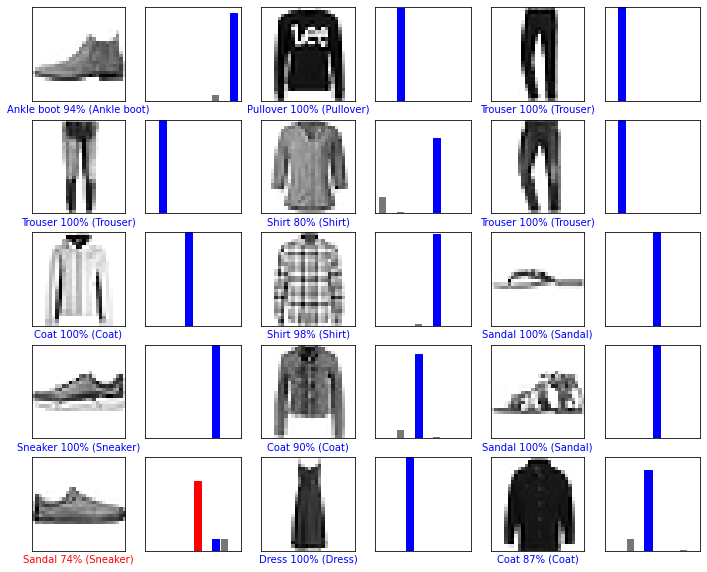

In [34]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()